<a href="https://colab.research.google.com/github/barbinanm/AlfaBank/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel('default_of_credit_card_clients.xlsx', index_col=0, header=1, sheet_name='Data')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Проверяем, есть ли пропущенные данные в датасете

In [ ]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Как видим, пропущенных данных нет

Посчитаем распределение целевой переменной в обучающей выборке датасета

In [ ]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Как видим, среди заемщиков преобладают те, у кого не ожидается дефолт в след.месяце (0)

In [ ]:
df['AGE'].mean().round(4)

35.4855

Средний возраст заемщиков - 35,5 лет

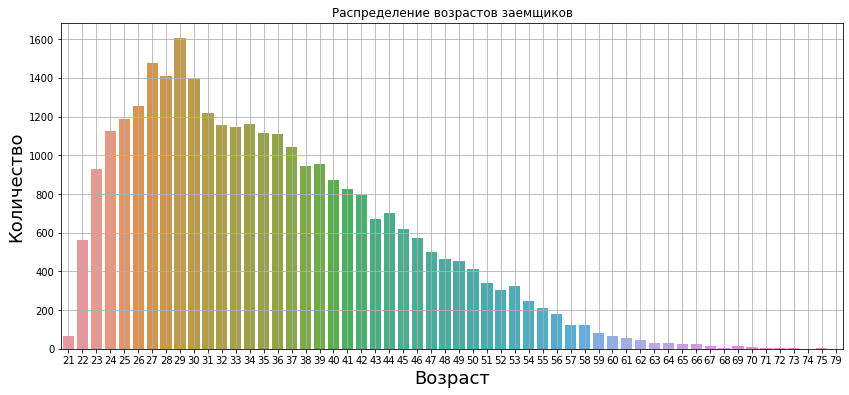

In [ ]:
ax1 = plt.figure(figsize=(14, 6))
ax1 = sns.countplot(x=df['AGE'])
ax1.set_xlabel('Возраст', fontsize=18) 
ax1.set_ylabel('Количество', fontsize=18)
ax1.set_title('Распределение возрастов заемщиков')
plt.grid()
plt.show()

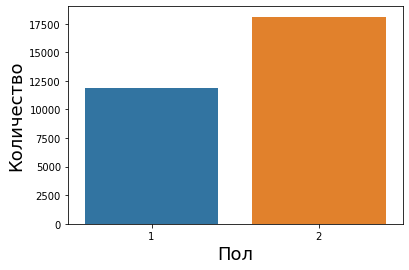

In [ ]:
ax1 = sns.countplot(x=df['SEX'])
ax1.set_xlabel('Пол', fontsize=18) 
ax1.set_ylabel('Количество', fontsize=18)
plt.show()

Среди заемщиков преобладают женщины

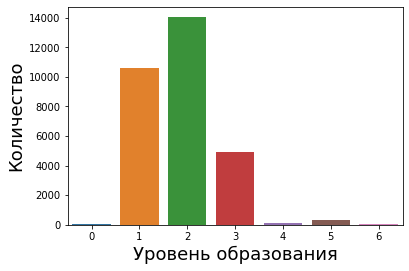

In [ ]:
ax1 = sns.countplot(x=df['EDUCATION'])
ax1.set_xlabel('Уровень образования', fontsize=18) 
ax1.set_ylabel('Количество', fontsize=18)
plt.show()

Гипотеза верна - среди заемщиков преобладают люди с университетским образованием

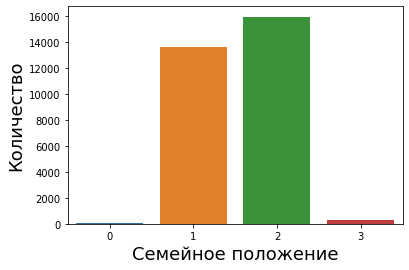

In [ ]:
ax1 = sns.countplot(x=df['MARRIAGE'])
ax1.set_xlabel('Семейное положение', fontsize=18) 
ax1.set_ylabel('Количество', fontsize=18)
plt.show()

В датасете примерно равное количество женатых и холостых заемщиков

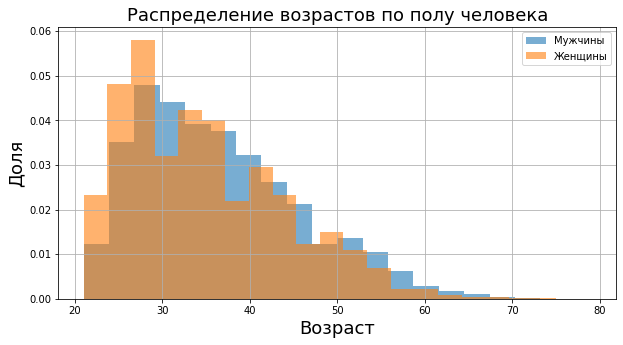

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df[df['SEX'] == 1]['AGE'], bins=20, density=True, alpha=0.6, label='Мужчины') # добавляем гистограмму распределения возрастов среди мужчин
plt.hist(df[df['SEX'] == 2]['AGE'], bins=20, density=True, alpha=0.6, label='Женщины') # добавляем гистограмму распределения возрастов среди женщин

plt.xlabel('Возраст', fontsize=18) 
plt.ylabel('Доля', fontsize=18)
plt.title('Распределение возрастов по полу человека', fontsize=18)
plt.grid()
plt.legend()
plt.show()

В целом, распределения по возрасту среди мужчин и женщин похожи